<h1> 2024 LoL Championship Player Stats & Swiss Stage <h1>


<h3> Imports <h3>

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import scipy.stats as stats
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [2]:
#Data
df=pd.read_csv("../data/player_statistics_cleaned_final.csv")

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
0,Top Esports,369,Top,8,0.500,3.1,2.5,2.4,4.9,7.6,...,0.13,322,5,424,0.000,0.25,0,2,China,D
1,Dplus KIA,aiming,Adc,9,0.333,4.8,5.0,2.0,4.7,10.1,...,0.10,-112,1,97,0.333,0.00,0,2,South Korea,F
2,MAD Lions KOI,alvaro,Support,5,0.200,1.5,0.2,4.4,6.2,1.2,...,0.49,-3,2,-256,0.000,0.60,0,-,Spain,D
3,Team Liquid,apa,Mid,10,0.500,2.4,3.5,3.2,4.2,8.7,...,0.18,278,2,216,0.400,0.00,0,3,United States,D
4,PSG Talon,azhi,Top,5,0.200,2.3,2.2,3.0,4.8,7.5,...,0.18,-311,-10,-168,0.200,0.00,0,-,Taiwan,D


<h3> Data exploration <h3>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamName       81 non-null     object 
 1   PlayerName     81 non-null     object 
 2   Position       81 non-null     object 
 3   Games          81 non-null     int64  
 4   Win rate       81 non-null     float64
 5   KDA            81 non-null     float64
 6   Avg kills      81 non-null     float64
 7   Avg deaths     81 non-null     float64
 8   Avg assists    81 non-null     float64
 9   CSPerMin       81 non-null     float64
 10  GoldPerMin     81 non-null     int64  
 11  KP%            81 non-null     float64
 12  DamagePercent  81 non-null     float64
 13  DPM            81 non-null     int64  
 14  VSPM           81 non-null     float64
 15  Avg WPM        81 non-null     float64
 16  Avg WCPM       81 non-null     float64
 17  Avg VWPM       81 non-null     float64
 18  GD@15       

In [4]:
df.describe()

,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,GoldPerMin,KP%,DamagePercent,...,VSPM,Avg WPM,Avg WCPM,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.00000,81.000000,81.000000,81.000000,...,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.0
mean,8.641975,0.455975,3.765432,2.686420,2.875309,6.755556,6.65679,362.654321,0.680790,0.199605,...,1.768025,0.743333,0.350988,0.269259,-36.753086,-0.469136,-17.876543,0.291654,0.098086,0.0
std,2.908215,0.214833,1.834677,1.519355,0.896734,2.390293,3.04885,72.095797,0.088962,0.084498,...,1.031010,0.676966,0.119610,0.162471,324.379081,5.886609,301.186752,0.203314,0.128330,0.0
min,3.000000,0.000000,1.200000,0.200000,1.300000,1.800000,1.00000,225.000000,0.410000,0.052000,...,0.760000,0.230000,0.100000,0.060000,-1172.000000,-16.000000,-797.000000,0.000000,0.000000,0.0
25%,6.000000,0.333000,2.400000,1.200000,2.400000,4.900000,5.70000,320.000000,0.623000,0.135000,...,1.100000,0.380000,0.250000,0.160000,-207.000000,-4.000000,-183.000000,0.143000,0.000000,0.0
50%,8.000000,0.500000,3.400000,2.500000,2.900000,6.200000,7.90000,385.000000,0.691000,0.215000,...,1.350000,0.450000,0.370000,0.190000,-3.000000,0.000000,6.000000,0.250000,0.077000,0.0
75%,10.000000,0.615000,4.400000,3.900000,3.300000,8.300000,8.90000,416.000000,0.751000,0.275000,...,1.700000,0.530000,0.430000,0.380000,159.000000,3.000000,147.000000,0.444000,0.143000,0.0
max,14.000000,0.875000,9.300000,5.600000,5.600000,12.400000,10.50000,486.000000,0.849000,0.337000,...,4.250000,2.430000,0.590000,0.670000,741.000000,10.000000,749.000000,0.800000,0.600000,0.0


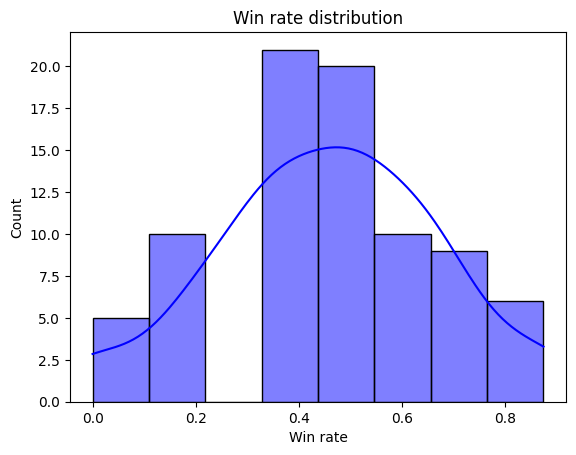

In [11]:
sns.histplot(data=df, x='Win rate', kde=True, color='blue')
plt.title('Win rate distribution')
plt.show()

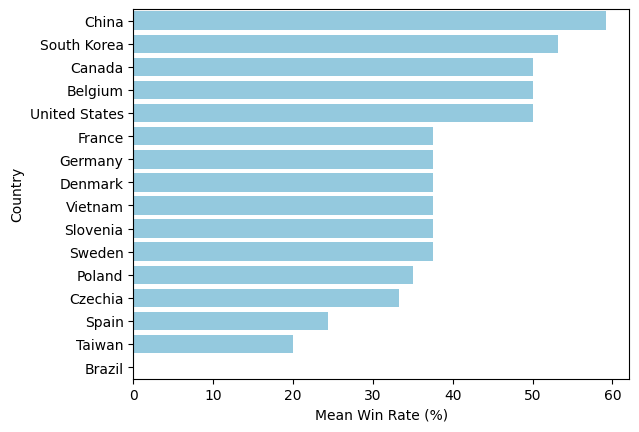

In [20]:
#EDA
#Differences in winrate among regions

region_winrate = df.groupby('Country')['Win rate'].mean().sort_values(ascending=False)
region_winrate = region_winrate.reset_index()
region_winrate['Win rate'] =region_winrate['Win rate'] *100
sns.barplot(data=region_winrate, x='Win rate', y='Country', color='skyblue')

# Dodanie tytułu i etykiet

plt.xlabel('Mean Win Rate (%)')
plt.ylabel('Country')
plt.show()

In [83]:
# Top 5 players KDA
top_kda = df.nlargest(5, 'KDA')[['PlayerName', 'TeamName','Country', 'KDA',"Position"]]

# Top 5 players DPM
top_dpm = df.nlargest(5, 'DPM')[['PlayerName', 'TeamName','Country', 'DPM']]

# Top 5 players KP%
top_kp = df.nlargest(5, 'KP%')[['PlayerName', 'TeamName','Country', 'KP%']]

# Wyświetlenie wyników
print("Top players KDA:")
print(top_kda)

print("\nTop players DPM:")
print(top_dpm)

print("\nTop players KP%:")
print(top_kp)

Top players KDA:
   PlayerName     TeamName      Country  KDA Position
62      scout  LNG Esports  South Korea  9.3      Mid
29   gumayusi           T1  South Korea  9.1      Adc
59       peyz        Gen.G  South Korea  8.4      Adc
14      chovy        Gen.G  South Korea  7.8      Mid
38      keria           T1  South Korea  7.5  Support

Top players DPM:
   PlayerName             TeamName        Country  DPM
69      viper  Hanwha Life Esports    South Korea  782
23        elk      Bilibili Gaming          China  778
5       betty            PSG Talon         Taiwan  776
76       yeon          Team Liquid  United States  731
48      maple            PSG Talon         Taiwan  718

Top players KP%:
   PlayerName             TeamName      Country    KP%
61     razork               Fnatic        Spain  0.849
58     peanut  Hanwha Life Esports  South Korea  0.821
1      aiming            Dplus KIA  South Korea  0.815
70        wei      Bilibili Gaming        China  0.806
73      woody     

In [84]:
fig = px.bar(
    top_kda,
    x='PlayerName',
    y='KDA',
    orientation='v',  # Orientacja pozioma
    title='Top 5 players KDA',
    labels={'PlayerName': 'Player Name', 'KDA': 'KDA'},  # Etykiety osi
    text='KDA',  # Dodanie wartości KDA do tooltipa
    hover_data={'TeamName': True, "Country": True, "Position": True}
)
fig.update_traces(marker_color='lightblue', textposition='outside')  # Kolor słupków i pozycja tekstu
fig.update_layout(
    yaxis_title='KDA',
    xaxis_title='Player Name'
)

# Wyświetlenie wykresu
fig.show()

In [59]:
team_kda = df.groupby('TeamName', as_index=False)['KDA'].mean()
team_kda = team_kda.sort_values(by='KDA', ascending=False)
team_kda['KDA'] = team_kda['KDA'].round(2)

In [60]:
fig = px.bar(
    team_kda,
    x='TeamName',
    y='KDA',
    orientation='v',  # Orientacja pozioma
    title='Mean KDA per Team',
    labels={'TeamName': 'Team Name', 'KDA': 'Mean KDA'},  # Etykiety osi
    text='KDA'  # Wyświetlenie wartości KDA na tooltipie
)

# Personalizacja wyglądu
fig.update_traces(marker_color='purple', textposition='outside')  # Kolor słupków i pozycja tekstu
fig.update_layout(
    yaxis_title='Mean KDA',
    xaxis_title='Team Name',
    template='plotly_white'
)

# Wyświetlenie wykresu
fig.show()

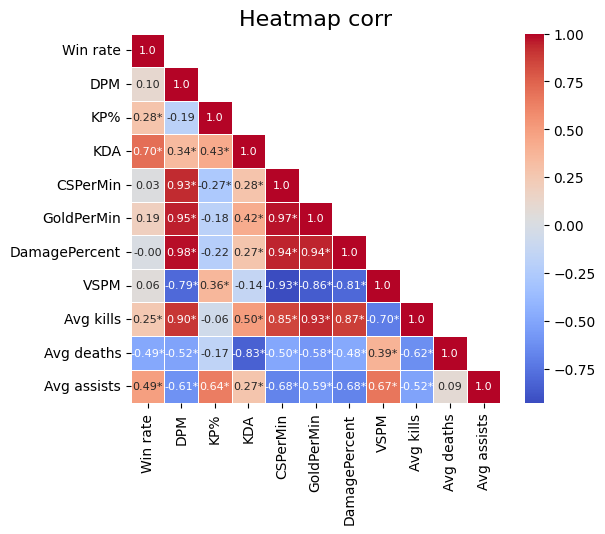

In [81]:
variables = ['Win rate','DPM', 'KP%', 'KDA', 'CSPerMin', 'GoldPerMin', 'DamagePercent', 'VSPM', 'Avg kills', 'Avg deaths', 'Avg assists']
p_values = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            corr, p_val = stats.pearsonr(df[var1], df[var2])  # Calculate correlation and p-value
            p_values.loc[var1, var2] = p_val  # Store p-value

# Step 2: Create the correlation matrix
correlation_matrix = df[variables].corr()

# Step 3: Create the annotation matrix with "*" for significant correlations
annot_matrix = correlation_matrix.copy().astype(object)  # Convert to object dtype for mixed types

for var1 in variables:
    for var2 in variables:
        if var1 != var2:
            if p_values.loc[var1, var2] < 0.05:  # If correlation is significant (p < 0.05)
                annot_matrix.loc[var1, var2] = f"{correlation_matrix.loc[var1, var2]:.2f}*"  # Add "*"
            else:
                annot_matrix.loc[var1, var2] = f"{correlation_matrix.loc[var1, var2]:.2f}"  # Regular correlation

# Step 4: Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)


# Step 5: Plot the heatmap
sns.heatmap(
    correlation_matrix,          # Correlation matrix
    annot=annot_matrix,          # Matrix for annotations (with stars for significant correlations)
    cmap='coolwarm',             # Color map (you can choose others like 'viridis')
    fmt='',                      # Disable default formatting as we use our own annotations
    mask=mask,                   # Mask the upper triangle of the matrix
    cbar=True,                   # Display color bar
    linewidths=0.5,              # Line thickness between cells
    square=True,                  # Make the plot square-shaped
    annot_kws={'size': 8}

)

plt.title('Heatmap corr', fontsize=16)
plt.show()

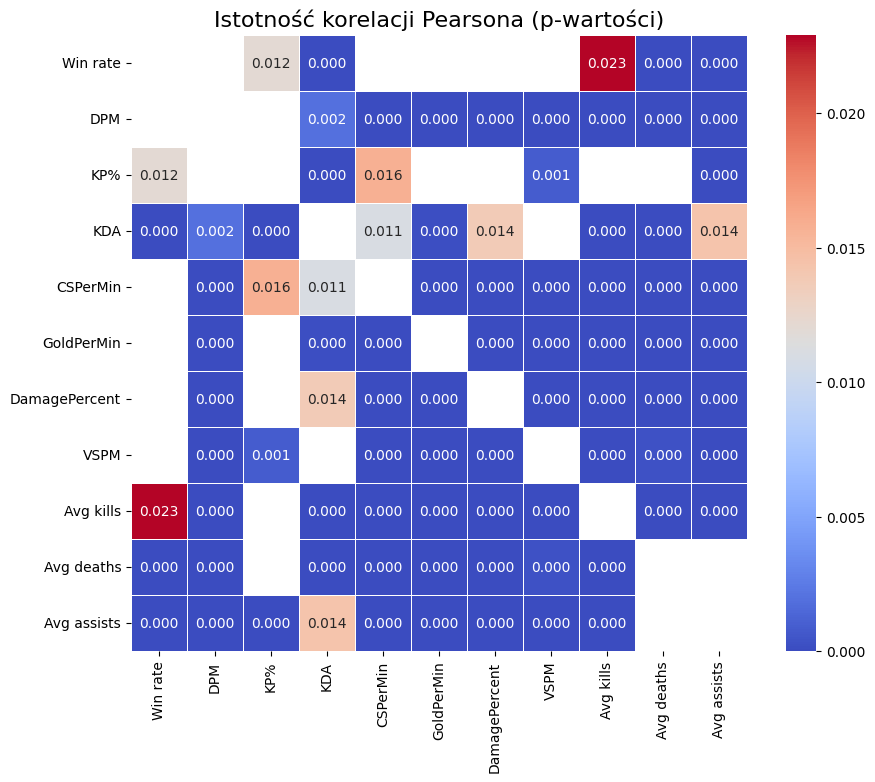

In [88]:
brasil = df[df["Country"] == "Brazil"]

In [89]:
brasil

,TeamName,PlayerName,Position,Games,Win rate,KDA,Avg kills,Avg deaths,Avg assists,CSPerMin,...,Avg VWPM,GD@15,CSD@15,XPD@15,FB %,FB Victim,Penta Kills,Solo Kills,Country,FlashKeybind
13,PaiN Gaming,cariok,Jungle,4,0.0,1.5,0.5,4.3,6.0,5.4,...,0.33,-636,-12,-625,0.25,0.5,0,-,Brazil,D
20,PaiN Gaming,dynquedo,Mid,4,0.0,2.4,3.5,3.0,3.8,8.4,...,0.24,-1172,-16,-634,0.25,0.0,0,-,Brazil,D
67,PaiN Gaming,titan,Adc,4,0.0,1.8,1.8,3.0,3.8,9.5,...,0.20,-820,-12,-797,0.25,0.0,0,1,Brazil,F


In [99]:
players = df['PlayerName'].unique()
def create_radar_chart(player):
    # Wybór danych gracza
    player_data = df[df['PlayerName'] == player].iloc[0]

    # Dane do wykresu radarowego
    categories = ['Avg kills', 'Avg deaths', 'Avg assists']
    values = [player_data['Avg kills'], player_data['Avg deaths'], player_data['Avg assists']]

    # Tworzenie wykresu radarowego
    fig2 = go.Figure(data=go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name=player
    ))
    fig2.update_layout(
        polar=dict(
            radialaxis=dict(range=[0, max(values)+1], tickvals=[0, max(values)//2, max(values)]),
        ),
        showlegend=False,
        title=f"Radar chart for {player}",
    )

    fig2.show()
dropdown = widgets.Dropdown(
    options=players,
    description='Player:',
    disabled=False
)

# Funkcja, która uruchamia wykres radarowy po zmianie wyboru
widgets.interactive(create_radar_chart, player=dropdown)

interactive(children=(Dropdown(description='Player:', options=('369', 'aiming', 'alvaro', 'apa', 'azhi', 'bett…